In [1]:
import ssl
import urllib
context = ssl._create_unverified_context()
from urllib.request import Request, urlopen
import json
from io import StringIO
import pandas as pd
import ast

In [2]:
from itertools import cycle
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [3]:
from dmtools_client_package.dmtools_client_module import DMToolsClient
from dmtools_client_package.dmtools_client_module import PlotTrace

In [4]:
## get api key and user id from local .env file
from dotenv import load_dotenv
import os
from os import environ, path
#BASE_DIR = path.abspath(path.dirname(__file__))
BASE_DIR = os.getcwd()
#load_dotenv(path.join(BASE_DIR, ".env"))
load_dotenv(path.join(BASE_DIR, ".env"), override=True)
MY_DMTOOLS_APIKEY = environ.get("MY_DMTOOLS_APIKEY")
MY_DMTOOLS_USERID = environ.get("MY_DMTOOLS_USERID")
Client = DMToolsClient(MY_DMTOOLS_USERID, MY_DMTOOLS_APIKEY)

In [5]:
## get api key and user id from local .env file
from dotenv import load_dotenv
import os
from os import environ, path
#BASE_DIR = path.abspath(path.dirname(__file__))
BASE_DIR = os.getcwd()
load_dotenv(path.join(BASE_DIR, ".env"))
MY_DMTOOLS_APIKEY = environ.get("MY_DMTOOLS_APIKEY")
MY_DMTOOLS_USERID = environ.get("MY_DMTOOLS_USERID")
Client = DMToolsClient(MY_DMTOOLS_USERID, MY_DMTOOLS_APIKEY)

In [6]:
#Client.request_header

In [7]:
# Define scale factors
a = Client.get_scale_factor("b")
print(a)

1e-24


In [8]:
purpose = 'read_all'
subject = 'limit_display'
id = ''
Client.create_current_url(purpose, subject, id)
all_limit_display_df = Client.read_current_as_df()
all_limit_display_df

,plot_id,color,style,updated_at,limit_id,id,created_at,subject,row_id
0,11,k,line,200908121136,273,48,2009-08-12 11:36:38,limit_display,0
1,11,r,line,200908121150,222,49,2009-08-12 11:38:42,limit_display,1
2,11,dkg,line,200908121140,202,50,2009-08-12 11:40:16,limit_display,2
3,12,k,dash,200908142122,51,53,2009-08-14 21:22:06,limit_display,3
4,12,k,line,200908142122,52,54,2009-08-14 21:22:07,limit_display,4
...,...,...,...,...,...,...,...,...,...
11664,4664,k,line,202108031957,1113,24917,2021-08-03 19:57:09,limit_display,11664
11665,4664,k,line,202108031957,1009,24918,2021-08-03 19:57:40,limit_display,11665
11666,4665,k,line,202111022029,322,24919,2021-11-02 20:29:28,limit_display,11666
11667,4667,k,line,202111031420,1115,24920,2021-11-03 14:20:11,limit_display,11667


In [9]:
combos = all_limit_display_df[['color','style']].drop_duplicates()
style_list = all_limit_display_df['style'].drop_duplicates().tolist()
color_list = all_limit_display_df['color'].drop_duplicates().tolist()

In [10]:
## Checking Translations

In [11]:
style_list = ['line', 'dash', 'fill', 'dot', 'hex', 'asterisk', 'tril', 'plus',
 'cross', 'circle', 'trid', 'pent', 'triu', 'trir', 'point']

In [12]:
color_list_plots = ['k', 'r', 'dkg', 'ltg', 'ltr', 'b', 'ltb', 'c', 'g10', 'g20', 'dkb', 'dkr', 'g', 'm', 'g60', 'g80', 'g90',
 'g30', 'y', 'g50', 'g70', 'g40', 'w']

color_list_default = ['LtR', 'LtB', 'DkR', 'DkG', 'Blue', 'k', 'DkB', 'Red', 'Grn', 'Mag', 'LtG', 'Blk', 'G60', 'Cyan']

In [13]:
## This Trace Class creates a Dictionary that can then be added directly to the plot
from dmtools_client_package.dmtools_client_module import PlotTrace

In [14]:
## test the class
style_list = ['line', 'dash', 'fill', 'dot', 'hex', 'asterisk', 'tril', 'plus',
 'cross', 'circle', 'trid', 'pent', 'triu', 'trir', 'point']

color_list = ['LtR', 'LtB', 'DkR', 'DkG', 'Blue', 'k', 'DkB', 'Red', 'Grn', 'Mag', 'LtG', 'Blk', 'G60', 'Cyan']


fig_chart_test = go.Figure(
        data=[go.Scatter(x=[], y=[])]
    )
pt = PlotTrace()

for sl in style_list:
    color_in = 'k'
    style_in = sl
    pt.set_values(color_in, style_in)
    #tc.set_trace_style('trir')
    #tc.__dict__

    fig_chart_test.add_trace(go.Scatter(pt.__dict__,x=[1],y=[2],name='name'))


In [15]:
pt.__dict__

{'mode': 'lines+markers',
 'line': {'color': 'black', 'width': 1, 'dash': 'solid'},
 'marker': {'symbol': 'x-dot'},
 'fillcolor': None,
 'opacity': 1,
 'fill': 'toself',
 'line_width': 1}

In [16]:
pt_in = {'mode': 'lines+markers',
 'line': {'color': 'black', 'width': 1, 'dash': 'dash'},
 'marker': {'symbol': 'blah'},
 'fillcolor': None,
 'opacity': 1,
 'fill': 'none'}
#fig_chart_test.add_trace(go.Scatter(tc_in,x=[1],y=[2],name='name'))

In [17]:
purpose = 'read_a'
subject = 'data'
id = 1
Client.create_current_url(purpose, subject, id)
a_data_json_obj = Client.read_current_as_json()
a_data_json_obj['data']

'[[["6.00000e+01", "4.00000e-43"], ["7.00000e+01", "4.00000e-43"], ["1.60000e+02", "5.50000e-44"], ["3.20000e+02", "2.50000e-44"], ["6.30000e+02", "3.20000e-44"], ["6.40000e+02", "3.00000e-44"], ["6.40000e+02", "1.20000e-44"], ["6.30000e+02", "1.00000e-44"], ["2.25000e+02", "9.00000e-45"], ["2.15000e+02", "7.00000e-45"], ["3.15000e+02", "7.00000e-46"], ["4.70000e+02", "2.10000e-46"], ["6.50000e+02", "7.00000e-47"], ["6.60000e+02", "6.80000e-47"], ["6.60000e+02", "2.00000e-47"], ["6.50000e+02", "2.00000e-47"], ["4.70000e+02", "6.00000e-47"], ["3.15000e+02", "1.00000e-46"], ["2.15000e+02", "3.00000e-46"], ["1.00000e+02", "8.00000e-46"], ["6.00000e+01", "1.00000e-45"], ["6.00000e+01", "4.00000e-43"]]]'

In [18]:
#nested_json_data = json.dumps(nested_payload).encode('utf-8')


#print("Payload:", json.dumps(nested_json_data))

In [19]:
#x = Client.clean_data_values(1)

In [20]:
x = Client.clean_data_values(1)
print(x)

{"data": "[[[\"6.00000e+01\", \"4.00000e-43\"], [\"7.00000e+01\", \"4.00000e-43\"], [\"1.60000e+02\", \"5.50000e-44\"], [\"3.20000e+02\", \"2.50000e-44\"], [\"6.30000e+02\", \"3.20000e-44\"], [\"6.40000e+02\", \"3.00000e-44\"], [\"6.40000e+02\", \"1.20000e-44\"], [\"6.30000e+02\", \"1.00000e-44\"], [\"2.25000e+02\", \"9.00000e-45\"], [\"2.15000e+02\", \"7.00000e-45\"], [\"3.15000e+02\", \"7.00000e-46\"], [\"4.70000e+02\", \"2.10000e-46\"], [\"6.50000e+02\", \"7.00000e-47\"], [\"6.60000e+02\", \"6.80000e-47\"], [\"6.60000e+02\", \"2.00000e-47\"], [\"6.50000e+02\", \"2.00000e-47\"], [\"4.70000e+02\", \"6.00000e-47\"], [\"3.15000e+02\", \"1.00000e-46\"], [\"2.15000e+02\", \"3.00000e-46\"], [\"1.00000e+02\", \"8.00000e-46\"], [\"6.00000e+01\", \"1.00000e-45\"], [\"6.00000e+01\", \"4.00000e-43\"]]]"}
None


In [21]:
purpose = 'read_all'
subject = 'data'
Client.create_current_url(purpose, subject, id)
all_data_json_obj = Client.read_current_as_json()

In [22]:
#for dic in all_data_json_obj:
#    data_id = dic['id']
#    Client.clean_data_values(data_id)

In [23]:
#string_csv = StringIO(lol)
#df = pd.read_csv(string_csv,sep=",", lineterminator="|")

In [24]:
## Illustrating new data string, existing data values are being retained

In [25]:
purpose = 'read_a'
subject = 'data'
id = '255'
Client.create_current_url(purpose, subject, id)
a_data_json_obj = Client.read_current_as_json()
#a_data_json_obj

{'id': '255',
 'limit_id': '273',
 'subject': 'data',
 'spin_dependency': 'SI',
 'result_type': 'Exp',
 'measurement_type': 'Dir',
 'x_units': 'GeV',
 'y_units': 'cm^2',
 'x_rescale': '1',
 'y_rescale': '1',
 'default_color': 'Red',
 'default_style': 'Line',
 'data_values': '{[7 1.972e-40;8 1.745e-41;9 3.99605e-42;10 1.44657e-42;11 6.88567e-43;12 3.92483e-43;13 2.53937e-43;14 1.80041e-43;15 1.36651e-43;20 6.34288e-44;25 4.82693e-44;30 4.46491e-44;35 4.47831e-44;40 4.64848e-44;45 4.90415e-44;50 5.1984e-44;55 5.5259e-44;60 5.87403e-44;65 6.23234e-44;70 6.60628e-44;75 6.98284e-44;80 7.35992e-44;85 7.74999e-44;90 8.13749e-44;95 8.53623e-44;100 8.92889e-44;110 9.72357e-44;120 1.05306e-43;130 1.1331e-43;140 1.21468e-43;150 1.29606e-43;160 1.37771e-43;170 1.459e-43;180 1.5407e-43;190 1.62236e-43;200 1.7051e-43;210 1.78694e-43;220 1.86914e-43;230 1.95139e-43;240 2.03334e-43;250 2.11671e-43;260 2.19926e-43;270 2.28064e-43;280 2.36274e-43;290 2.44543e-43;300 2.52858e-43;310 2.61202e-43;320 2.693

In [26]:
purpose = 'read_all'
subject = 'plot'
Client.create_current_url(purpose, subject, id)
all_plots_df = Client.read_current_as_df()
#all_plots_df.columns

Index(['x_min', 'plot_eps', 'x_units', 'y_units', 'legend_eps', 'old_id',
       'user_id', 'no_id', 'subject', 'created_at', 'open', 'old_name',
       'updated_at', 'old_user_id', 'y_min', 'archived_at', 'name', 'x_max',
       'plot_png', 'id', 'y_max', 'legend_png', 'row_id'],
      dtype='object')

In [27]:
#all_plots_df.head(5)
all_plots_df[['id', 'old_id', 'y_units','open', 'user_id','name', 'created_at', 'row_id']].head(5)

,id,old_id,y_units,open,user_id,name,created_at,row_id
0,20,53,cm2,1,None,XENON10_for_thesis,2009-10-14 07:48:53,0
1,26,66,cm2,1,None,XENON10_LUX_compare,2009-11-19 14:22:11,1
2,33,73,cm2,1,None,XENON10_LUX_ZEPLINIII,2009-11-23 21:12:03,2
3,54,107,cm2,1,None,CDMS_new_results,2010-01-04 18:59:18,3
4,74,148,cm2,1,None,CoGeNT_plus_Xenon_100_New,2010-02-05 00:29:07,4


In [43]:
def GetPlotsContaining(string_in):
    purpose = 'read_all'
    subject = 'plot'
    Client.create_current_url(purpose, subject, id)
    all_plots_df = Client.read_current_as_df()
    #all_plots_df.columns
    return_df = all_plots_df[['id', 'old_id', 'y_units','open', 'user_id','name', 'created_at']][all_plots_df['name'].str.contains(string_in)].copy()
    return_df['created_at'] = pd.to_datetime(return_df['created_at'], errors='coerce')
    return_df['created_at'] = return_df['created_at'].dt.strftime('%Y%m%d%H%M')
    return return_df
relevant_plots = GetPlotsContaining('CDMS')
relevant_plots.head(5)

,id,old_id,y_units,open,user_id,name,created_at
3,54,107,cm2,1,None,CDMS_new_results,201001041859
6,97,183,cm2,1,None,CDMS II limits,201002280018
8,138,250,cm2,1,None,"ZEPLIN-III, XENON10, CDMS",201004201202
11,156,269,cm2,1,None,LUX-XENON100-SuperCDMS,201005032038
12,159,272,cm2,1,None,SuperCDMS-XENON100-LUX,201005041733


In [29]:
def get_new_plot_id_from_old_id(all_plots_df_in, old_plot_id_in):
    purpose = 'read_all'
    subject = 'plot'
    Client.create_current_url(purpose, subject, id)
    all_plots_df = Client.read_current_as_df()
    old_plot_details_ret = all_plots_df[['name','x_units', 'id', 'y_units','old_id',  'x_min', 'x_max', 'y_min', 'y_max']] \
    [all_plots_df['old_id']==old_plot_id_in]
    return old_plot_details_ret


old_plot_id = '107'
old_plot_details = get_new_plot_id_from_old_id(all_plots_df,old_plot_id)
plot_id = old_plot_details['id'].iloc[0]
plot_id

'54'

In [30]:
def get_this_plot_as_json(plot_id_in):
    purpose = 'read_a'
    subject = 'plot'
    id_in = plot_id_in
    Client.create_current_url(purpose, subject, id_in)
    this_plot_ret = Client.read_current_as_json()
    #this_plot_ret = all_plots_df[all_plots_df['id']==plot_id_in].copy()
    #this_plot.columns
    #this_plot_ret['created_at'] = pd.to_datetime(this_plot['created_at'], errors='coerce')
    #this_plot_ret['created_at'] = this_plot_ret['created_at'].dt.strftime('%Y%m%d%H%M')
    #this_plot_ret['updated_at'] = pd.to_datetime(this_plot['updated_at'], errors='coerce')
    #this_plot_ret['updated_at'] = this_plot_ret['updated_at'].dt.strftime('%Y%m%d%H%M')
    #this_plot_ret[['name','x_max', 'updated_at', 'y_min', 'subject', 'y_max',
    #       'id', 'x_units', 'old_id', 'y_units',
    #       'open', 'user_id', 'name',
    #       'x_min', 'created_at', 'row_id']]
    return this_plot_ret
this_plot = get_this_plot_as_json('54')
this_plot

{'id': '54',
 'subject': 'plot',
 'old_id': '107',
 'open': '1',
 'name': 'CDMS_new_results',
 'x_min': '1.000000e+00',
 'x_max': '1.000000e+04',
 'y_min': '-5.000000e+01',
 'y_max': '-3.600000e+01',
 'x_units': 'GeV/c^2',
 'y_units': 'cm2',
 'user_id': 'None',
 'updated_at': '2011-11-10 16:31:54'}

In [31]:
class ThisPlot():
    def __init__(self,all_plots_df_in,plot_id_in):
        self.this_plot = all_plots_df_in[all_plots_df_in['id']==plot_id_in]
        #this_plot
        self.start_x_range = float(self.this_plot.iloc[0]['x_min'])
        self.stop_x_range = float(self.this_plot.iloc[0]['x_max'])
        self.start_y_range = float(self.this_plot.iloc[0]['y_min'])
        self.stop_y_range = float(self.this_plot.iloc[0]['y_max'])
        self.plot_name = self.this_plot.iloc[0]['name']
        self.old_id = self.this_plot.iloc[0]['old_id']


CurrentPlot = ThisPlot(all_plots_df, plot_id)


In [32]:
CurrentPlot.__dict__

{'this_plot':           x_min plot_eps  x_units y_units legend_eps old_id user_id no_id  \
 3  1.000000e+00     None  GeV/c^2     cm2       None    107    None     0   
 
   subject           created_at  ... old_user_id          y_min  \
 3    plot  2010-01-04 18:59:18  ...        None  -5.000000e+01   
 
            archived_at              name         x_max plot_png  id  \
 3  1980-01-01 00:00:00  CDMS_new_results  1.000000e+04     None  54   
 
            y_max legend_png row_id  
 3  -3.600000e+01       None      3  
 
 [1 rows x 23 columns],
 'start_x_range': 1.0,
 'stop_x_range': 10000.0,
 'start_y_range': -50.0,
 'stop_y_range': -36.0,
 'plot_name': 'CDMS_new_results',
 'old_id': '107'}

In [44]:
def get_limit_displays_for_old_plot(old_plot_id_in, request_header_in):
    fastapi_url_limit_displays = api_server + data_api + "read_by_plot_limit_display/"
    request = Request(fastapi_url_limit_displays + '?id_in=' + str(old_plot_id_in), headers=request_header_in)
    r = urllib.request.urlopen(request, context=context)
    string = r.read().decode('utf-8')
    limit_display_json_obj = json.loads(string)
    limit_display_df_ret = pd.DataFrame(limit_display_json_obj)
    limit_display_df_ret['row_id'] = limit_display_df_ret.index
    limit_display_df_ret['updated_at'] = pd.to_datetime(limit_display_df_ret['updated_at'], errors='coerce')
    limit_display_df_ret['updated_at'] = limit_display_df_ret['updated_at'].dt.strftime('%Y%m%d%H%M')
    return limit_display_df_ret

purpose = 'read_by_plot'
subject = 'limit_display'
Client.create_current_url(purpose, subject, old_plot_id)
limit_display_df = Client.read_current_as_df()
limit_display_df['row_id'] = limit_display_df.index
limit_display_df['updated_at'] = pd.to_datetime(limit_display_df['updated_at'], errors='coerce')
limit_display_df['updated_at'] = limit_display_df['updated_at'].dt.strftime('%Y%m%d%H%M')

limit_display_df

,id,limit_id,plot_id,color,style,updated_at,subject,row_id
0,457,273,107,r,line,201111101631,limit_display,0
1,458,136,107,g,dash,201001041902,limit_display,1
2,460,305,107,k,line,201001041910,limit_display,2
3,3216,407,107,c,fill,201107220146,limit_display,3
4,3217,216,107,ltg,fill,201107220145,limit_display,4


In [46]:
purpose = 'read_by_plot'
subject = 'data_display'
Client.create_current_url(purpose, subject, plot_id)
data_display_df = Client.read_current_as_df()
data_display_df['row_id'] = data_display_df.index
data_display_df['updated_at'] = pd.to_datetime(data_display_df['updated_at'], errors='coerce')
data_display_df['updated_at'] = data_display_df['updated_at'].dt.strftime('%Y%m%d%H%M')

data_display_df

,id,subject,name,old_id,old_plot_id,limit_id,plot_id,color,style,data_id,updated_at,open,row_id
0,95,data_display,None,None,107,273,54,r,line,255,201111101631,1,0
1,96,data_display,None,None,107,136,54,g,dash,134,201001041902,1,1
2,97,data_display,None,None,107,305,54,k,line,271,201001041910,1,2
3,151,data_display,None,None,107,407,54,c,fill,350,201107220146,1,3
4,152,data_display,None,None,107,216,54,ltg,fill,200,201107220145,1,4


In [48]:
def get_data_for_plot(plot_id_in):
    purpose = 'read_by_plot'
    subject = 'data_display'
    Client.create_current_url(purpose, subject, plot_id_in)
    data_display_df = Client.read_current_as_df()
    data_data_df_ret = pd.DataFrame()
    data_df_ret = pd.DataFrame()
    for index, row in data_display_df.iterrows():
        #print(row['c1'], row['c2']
        #print('data id from data >>>>', row['data_id'])
        purpose = 'read_a'
        subject = 'data'
        Client.create_current_url(purpose, subject, row['data_id'])
        a_data_json_obj = Client.read_current_as_json()
        data_label = a_data_json_obj['data_label']
        data_string = a_data_json_obj['data']
        # Convert the string back to a list of lists of lists
        reconstructed_list = json.loads(data_string)
        #print("Deserialized list:", reconstructed_list)
        
        # Flatten the list and add a reference to the top-level list
        flattened_data = []
        for i, sublist in enumerate(reconstructed_list):
            for inner_list in sublist:
                flattened_data.append([i+1] + inner_list)
        
        # Create a DataFrame from the flattened list
        columns = ['trace_id', 'x', 'y']
        data_data_resp_df = pd.DataFrame(flattened_data, columns=columns)
        #print(data_string)
        # Convert the string to an actual list
        #data_eval = ast.literal_eval(data_string)
        #print(data_eval)
        # Flatten the list of lists of lists into a 2D list
        #flattened_data = [inner for outer in data_eval for inner in outer]
        #print(flattened_data)
        # Convert the 2D list to a DataFrame
        #df = pd.DataFrame(flattened_data)
        #data_data_resp_df['data_id'] = row['data_id']

        data_df_resp = pd.DataFrame(data=a_data_json_obj, index=[0])
        #a_data_json_obj
        #print(a_data_json_obj)
        try:
            y_rescale = float(a_data_json_obj['y_rescale'])
        except:
            y_rescale = 1
        try:
            x_rescale = float(a_data_json_obj['x_rescale'])
        except:
            x_rescale = 1
        
        ## when do we rescale?
        data_data_resp_df['cross_sections'] = data_data_resp_df['y'].astype(float).apply(lambda y: y * y_rescale)
        data_data_resp_df['masses'] = data_data_resp_df['x'].astype(float).apply(lambda x: x * x_rescale)
        data_data_resp_df['trace_name'] = data_label
        data_data_resp_df['data_id'] = row['data_id']

        data_data_df_ret = pd.concat([data_data_df_ret,data_data_resp_df])
        data_df_ret = pd.concat([data_df_ret,data_df_resp])

    return data_df_ret , data_data_df_ret # data_df_ret , data_data_df_ret

data_df , data_data_df = get_data_for_plot(plot_id)
#data_data_df.head(5)
#data_df
data_data_df

,trace_id,x,y,cross_sections,masses,trace_name,data_id
0,1,7.00000e+00,1.97200e-40,1.972000e-40,7.0,"XENON10, 2007, first results, 58.6 live days, SI",255
1,1,8.00000e+00,1.74500e-41,1.745000e-41,8.0,"XENON10, 2007, first results, 58.6 live days, SI",255
2,1,9.00000e+00,3.99605e-42,3.996050e-42,9.0,"XENON10, 2007, first results, 58.6 live days, SI",255
3,1,1.00000e+01,1.44657e-42,1.446570e-42,10.0,"XENON10, 2007, first results, 58.6 live days, SI",255
4,1,1.10000e+01,6.88567e-43,6.885670e-43,11.0,"XENON10, 2007, first results, 58.6 live days, SI",255
...,...,...,...,...,...,...,...
59,1,2.00000e+02,5.04887e-10,5.048870e-46,200.0,"Arrenberg et. al., 2008, Kaluza Klein DM in Un...",200
60,1,1.50000e+02,1.21404e-09,1.214040e-45,150.0,"Arrenberg et. al., 2008, Kaluza Klein DM in Un...",200
61,1,1.00000e+02,5.35327e-09,5.353270e-45,100.0,"Arrenberg et. al., 2008, Kaluza Klein DM in Un...",200
62,1,5.00000e+01,1.37176e-07,1.371760e-43,50.0,"Arrenberg et. al., 2008, Kaluza Klein DM in Un...",200


In [50]:
#trace_list = data_data_df[['data_id','trace_id']].drop_duplicate()
trace_list_refs = data_data_df[['data_id','trace_id','trace_name']].copy()
trace_list = trace_list_refs.drop_duplicates()
trace_list

,data_id,trace_id,trace_name
0,255,1,"XENON10, 2007, first results, 58.6 live days, SI"
0,134,1,LUX 300 kg LXe Projection (Jul 2007) - Offline
0,271,1,"CDMS II (Soudan), 2009, Ge detector, SI"
0,350,1,"CoGeNT, 2010, models with M_wimp ~7-11 GeV per..."
0,200,1,"Arrenberg et. al., 2008, Kaluza Klein DM in Un..."


In [51]:
#data_data_df.head(5)
min_cross_sections = data_data_df['cross_sections'].min()
max_cross_sections = data_data_df['cross_sections'].max()
min_masses = data_data_df['masses'].min()
max_masses = data_data_df['masses'].max()

print('min y :' ,min_cross_sections)
print('max y :' ,max_cross_sections)
print('min x :' ,min_masses)
print('max x :' ,max_masses)

#print(start_x_range)
#print(stop_x_range)
#print(start_y_range)
#print(stop_y_range)

min y : 3.1794e-48
max y : 3.84013e-31
min x : 3.425
max x : 10000.0


In [52]:
## need this for the inital build of the dash layout
def create_blank_chart_for_plot(plot_name_in, plot_id_in, old_plot_id_in):
    y_title_text = r"$\text{WIMP Mass [GeV}/c^{2}]$"
    x_title_text = r"$\text{Cross Section [cm}^{2}\text{] (normalized to nucleon)}$"
    plot_title = plot_name_in + " - Plot Reference:" + str(plot_id_in) + " - Old Plot ID:" + str(old_plot_id_in)
    #plot_title
    ## create empty chart
    fig_chart_out = go.Figure(data=[go.Scatter(x=[], y=[])])
    fig_chart_out.update_layout( autosize=False, width=800, height=800, )
    fig_chart_out.update_layout(xaxis_range=[-1,-4])
    fig_chart_out.update_layout(yaxis_range=[-1,-4])
    fig_chart_out.update_layout(
            margin=dict(l=0, r=0, t=20, b=0),
            paper_bgcolor="LightSteelBlue",)

    fig_chart_out.update_layout(
        title=dict(text=plot_title , font=dict(size=18), automargin=True, yref='paper')
    )
    fig_chart_out.update_xaxes(
        #title_text=x_title_text,
        #type="log"
        type="linear"
    )
    fig_chart_out.update_yaxes(
        #title_text=y_title_text,
        type="log"
        #type="linear"
    )
    return fig_chart_out

fig_chart = create_blank_chart_for_plot('plotty',plot_id, old_plot_id)
#fig_chart.show()

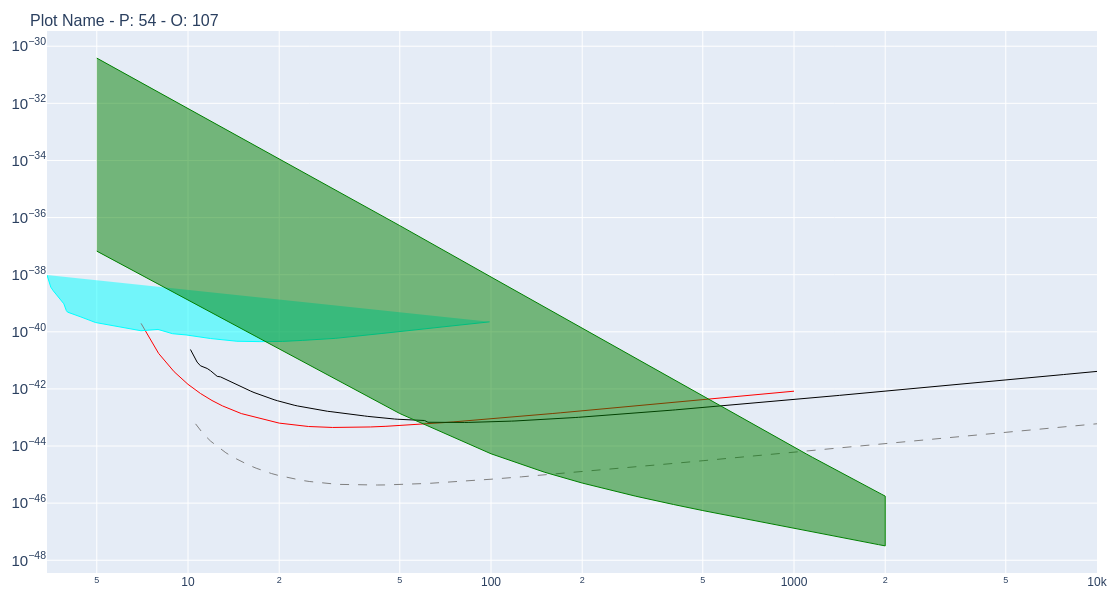

In [53]:
def create_actual_plot(plot_name_in, plot_id_in, old_plot_id_in, data_display_df_in, data_data_df_in):
    ## requirement to keep plots square
    #if screen_height_in > screen_width_in:
    #    plot_square_dimensions =
    #plot_square_dimensions = self.screen_height / 2
    plot_square_dimensions = 600

    m1 = go.layout.Margin(l=20,r=10,b=20,t=20,pad=0)
    hw = go.Layout(autosize=False,width=plot_square_dimensions,height=plot_square_dimensions)
    y_title_text = r"$\text{Cross Section [cm}^{2}\text{] (normalized to nucleon)}$"

    y1 = go.layout.YAxis(#title=y_title_text,
                        title_standoff = 0,
                        #range=[start_y_range,stop_y_range],
                        type="log",
                        titlefont=go.layout.yaxis.title.Font(color='SteelBlue'))

    x_title_text = r"$\text{WIMP Mass [GeV}/c^{2}]$"
    x1 = go.layout.XAxis(#title=x_title_text,
                        title_standoff = 0,
                        type="log",
                        #type="linear",
                        #range=[start_x_range,stop_x_range],
                        titlefont=go.layout.xaxis.title.Font(color='SteelBlue'))


    ##title1=go.layout.Title(text="Dark Matter Detection Results")

    fig_chart_populated = go.Figure(
        data=[go.Scatter(x=[], y=[])],
        layout=go.Layout(
            margin=m1,
            yaxis= y1,
            xaxis= x1
        )
    )

    plot_title = plot_name_in + " - P: " + str(plot_id_in) + " - O: " + str(old_plot_id_in)

    fig_chart_populated.update_layout(
        title=dict(text=plot_title ,font=dict(size=16),automargin=True,yref='paper')
    )

    fig_chart_populated.update_layout(hw)

    for index, row in data_display_df_in.iterrows():
        #print(row['limit_id'])
        data_id_selected = row['data_id']
        #print('selected data_id >>', data_id_selected)
        #data_about_selected_df = self.data_about_df[self.data_about_df['data_id']==data_id_selected].copy()
        data_display_selected_df_in = data_display_df_in[data_display_df_in['data_id']==data_id_selected].copy()
        data_data_selected_df_in = data_data_df_in[data_data_df_in['data_id']==data_id_selected].copy()
        trace_list_refs = data_data_selected_df_in[['data_id','trace_id','trace_name']].copy()
        trace_list = trace_list_refs.drop_duplicates()
        trace_style = data_display_selected_df_in['style'].iloc[0]
        trace_color = data_display_selected_df_in['color'].iloc[0]
        pt = PlotTrace()
        pt.set_values(trace_color, trace_style)
        for index, row in trace_list.iterrows():
            #print(row)
            trace_data = data_data_df[(data_data_df['data_id']==row['data_id']) & (data_data_df['trace_id']==row['trace_id'])]
            #print(trace_data)
            #print("trace_data >>>>" , trace_data)
            trace_name = row['trace_name']
            fig_chart_populated.add_trace(go.Scatter(pt.__dict__,
                                              x=trace_data['masses'],
                                              y=trace_data['cross_sections'],
                                              name=trace_name,
                                                      showlegend=False
                                                  ))
    return fig_chart_populated
fig_chart_1 = create_actual_plot('Plot Name', plot_id, old_plot_id, data_display_df, data_data_df )
fig_chart_1.show()

In [54]:
'''
## are we happy with hover template now data is 5 decimal places?
hovertemplate =
                                               '<i><b>Cross Section</b></i>: %{y:.4E}'+
                                                  '<br><b>Mass</b>: %{x}<br>',
showlegend=False,
'''

"\n## are we happy with hover template now data is 5 decimal places?\nhovertemplate =\n                                               '<i><b>Cross Section</b></i>: %{y:.4E}'+\n                                                  '<br><b>Mass</b>: %{x}<br>',\nshowlegend=False,\n"

In [55]:
limit_display_df

,id,limit_id,plot_id,color,style,updated_at,subject,row_id
0,457,273,107,r,line,201111101631,limit_display,0
1,458,136,107,g,dash,201001041902,limit_display,1
2,460,305,107,k,line,201001041910,limit_display,2
3,3216,407,107,c,fill,201107220146,limit_display,3
4,3217,216,107,ltg,fill,201107220145,limit_display,4


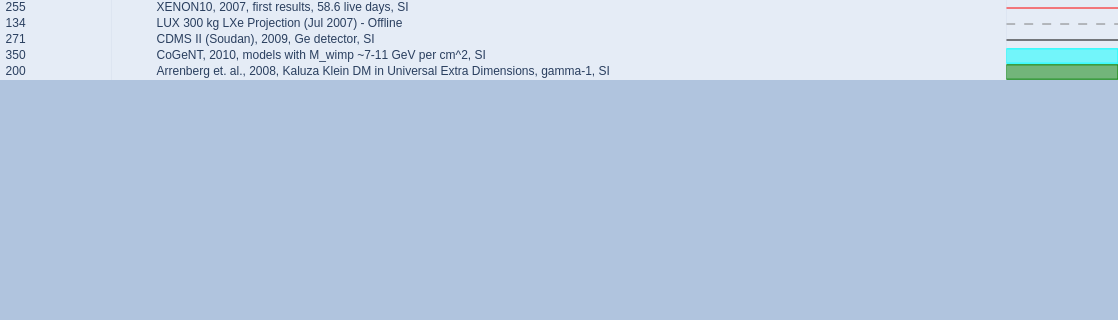

In [56]:
def create_populated_legend(data_display_df_in, data_df_in):
    rows_list = list(range(1,20))
    cols_list = list(range(1,4))

    table_rows=20
    table_cols=3
    #plot_square_dimensions = screen_height_in / 2
    legend_width = 600 ## this will be a maximum and will shrink if screen size < 800
    legend_height = 20 * 16
    fig_chart_legend = make_subplots(
                      column_titles = ['data_id','format'],
                      rows=table_rows,
                      cols=table_cols,
                      horizontal_spacing = 0.00,
                      vertical_spacing = 0.00,
                      #subplot_titles=(titles)
                      column_widths=[0.1,0.8,0.1])

    fig_chart_legend.update_layout(
        #    autosize=False,
            width=legend_width,
            height=legend_height,
            margin=dict(
                l=0,
                r=0,
                b=0,
                t=0,
                pad=0
            ),
            paper_bgcolor="LightSteelBlue",
        )

    fig_chart_legend.update_xaxes(showgrid=False)
    fig_chart_legend.update_yaxes(showgrid=False)
    #legend
    fig_chart_legend.update_layout(showlegend=False)
    #x axis
    fig_chart_legend.update_xaxes(visible=False)
    #y axis
    fig_chart_legend.update_yaxes(visible=False)

    fig_chart_legend.data = []
    #fig_legend_out.show()

    # Any changes to the fig must be applied to the DataFrame as the dataframe
    # will be used when the plot is saved.
    # Saving zoom is still to be implemented

    #print("CD : data_display_df>>>>>>>>>", data_display_df_in)

    display_legend_df = data_display_df_in[['data_id','color','style']].copy()
    display_legend_df.drop_duplicates(inplace=True)

    rowloop = 1
    for index, row in display_legend_df.iterrows():
        data_selected_df = data_df_in[data_df_in['id']==row['data_id']].copy()
        trace_name = data_selected_df['data_label'].iloc[0]
        for c in cols_list: #enumerate here to get access to i
            # STEP 2, notice position of arguments!
            #table_column_names = ['data_id','data_label','format']
            scatter_mode_list = ['text-number','text-text','format']
            table_column_names = ['data_id','trace_name','format']
            trace_style = row['style']
            trace_color = row['color']
            data_id = row['data_id']
            pt = PlotTrace()
            pt.set_values(trace_color, trace_style)
            #tc.set_row_col(rowloop, c)
            #scatter_mode_list = ['text-number','text-text','format']
            #current_column = table_column_names[c-1]
            #current_mode = scatter_mode_list[c-1]
            current_column = table_column_names[c-1]
            current_mode = scatter_mode_list[c-1]
            #print(rowloop,current_column, current_mode )
            if current_mode =='format':
                mode = pt.__dict__['mode']
                #fill = 'toself'
                fill = pt.__dict__['fill']
                if mode == 'lines' and fill == 'none':
                    x_data = [0,1]
                    y_data = [0.5,0.5]
                elif mode == 'lines' and fill == 'toself':
                    x_data = [0,1,1,0,0]
                    y_data = [0,0,1,1,0]
                else:
                    x_data = [0,1]
                    y_data = [0.5,0.5]

                fig_chart_legend.add_trace(go.Scatter(pt.__dict__,x=x_data,
                                            y=y_data),
                              row=rowloop, #index for the subplot, i+1 because plotly starts with 1
                              col=c)

            if current_mode =='text-number':
                fig_chart_legend.add_trace(go.Scatter(x=[1,2],
                                          textposition='middle right',
                                          y=[1,1],
                                          mode='text',
                                          text=[str(data_id),'']
                                        ),
                              row=rowloop, #index for the subplot, i+1 because plotly starts with 1
                              col=c)
            if current_mode =='text-text':
                fig_chart_legend.add_trace(go.Scatter(x=[1,2],
                                          textposition='middle right',
                                          y=[1,1],
                                          mode='text',
                                          text=[trace_name,'']
                                        ),
                              row=rowloop, #index for the subplot, i+1 because plotly starts with 1
                              col=c)

        rowloop=rowloop+1
        fig_chart_legend.update_xaxes(showgrid=False)
        fig_chart_legend.update_yaxes(showgrid=False)
        #legend
        fig_chart_legend.update_layout(showlegend=False)
        #x axis
        fig_chart_legend.update_xaxes(visible=False)
        #y axis
        fig_chart_legend.update_yaxes(visible=False)

    return fig_chart_legend

legend_fig = create_populated_legend(data_display_df, data_df)
legend_fig.show()

In [ ]:
data_display_df

In [ ]:
data_df